# Pandas

In [1]:
pip install --upgrade pandas

Requirement already up-to-date: pandas in /Users/matt/Developer/book-python/.venv-3.8.2/lib/python3.8/site-packages (1.0.3)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

pd.__version__

'1.0.3'

## Series Create

1. Ustaw ziarno losowości na zero
1. Stwórz ``pd.Series`` z 10 liczbami parzystymi z zakresu ``<0;9>`` (włącznie)

In [3]:
np.random.seed(0)
numbers = np.random.randint(0, 9, size=100)
even = numbers[numbers % 2 == 0][:10]

pd.Series(even)

0    0
1    2
2    4
3    6
4    8
5    8
6    6
7    8
8    8
9    4
dtype: int64

## Series Create Timeseries

1. Gagarin poleciał w kosmos w 1961-04-12
1. Armstrong postawił stopę na Księżycu w 1969-07-21
1. Stwórz ``pd.Series`` z dniami pomiędzy startem Gagarina a pierwszym krokiem Armstronga
1. Jak wiele dni upłynęło?

In [4]:
gagarin = '1961-04-12'
armstrong = '1969-07-21'
between = pd.date_range(start=gagarin, end=armstrong)

s = pd.Series(between)
len(s)

3023

## Series Indexing

1. Ustaw ziarno losowości na zero
1. Stwórz ``pd.Series`` z 100 losowymi liczbami z rozkładu normalnego
1. Indeksem w serii mają być kolejne dni od 2000 roku
1. Wypisz wartości:

    * dnia 2000-01-05,
    * dnia 2000-02-29,
    * pierwszy w serii,
    * ostatni w serii,
    * środkowa wartość serii.

In [5]:
np.random.seed(0)

s = pd.Series(
    data = np.random.randn(100),
    index = pd.date_range('2000-01-01', periods=100))

middle = int(len(s) / 2)


print(s['2000-01-05'])
print(s['2000-02-29'])
print(s[0])
print(s[-1])
print(s[middle])

1.8675579901499675
-0.3627411659871381
1.764052345967664
0.40198936344470165
-0.8954665611936756


## Series Slicing

1. Ustaw ziarno losowości na zero
1. Stwórz ``pd.Series`` z 100 losowymi liczbami z rozkładu normalnego
1. Indeksem w serii mają być kolejne dni od 2000 roku
1. Wytnij daty od 2000-02-14 do końca lutego 2000
1. Wypisz wyniki


In [6]:
np.random.seed(0)

s = pd.Series(
    data = np.random.randn(100),
    index = pd.date_range('2000-01-01', periods=100))

s['2000-02-14':'2000-02']

2000-02-14   -0.509652
2000-02-15   -0.438074
2000-02-16   -1.252795
2000-02-17    0.777490
2000-02-18   -1.613898
2000-02-19   -0.212740
2000-02-20   -0.895467
2000-02-21    0.386902
2000-02-22   -0.510805
2000-02-23   -1.180632
2000-02-24   -0.028182
2000-02-25    0.428332
2000-02-26    0.066517
2000-02-27    0.302472
2000-02-28   -0.634322
2000-02-29   -0.362741
Freq: D, dtype: float64

## Series Alphabet

1. Stwórz ``pd.Series`` z 26 losowymi liczbami całkowitymi z przedziału ``<10; 100)``
1. Nazwij indeksy jak kolejne litery alfabetu angielskiego
1. Za pomocą biblioteki ``statistics`` znajdź medianę alfabetu
1. Jak znaleźć medianę dla parzystej długości listy? (Użyj dolnego elementu)
1. Jak znaleźć element w liście o zadanym indeksie?
1. Wytnij z serii po 3 elementy w górę i w dół od wyszukanego środka
1. Zsumuj wyniki

In [7]:
from string import ascii_lowercase
from statistics import median_low

np.random.seed(0)

indexes = list(ascii_lowercase)
median = median_low(ascii_lowercase)
idx = indexes.index(median)

s = pd.Series(
    index = indexes,
    data = np.random.randint(10, 100, size=26))

s[idx-3:idx+4].sum()

538

## Series Update

1. Z danych wejściowych stwórz ``pd.Series``
1. Wypełnij puste wartości zerami
1. Usuń wartości na indeksach 2, 4, 6
1. Usuń duplikujące się wartości
1. Zresetuj indeks (bez kopii starego)
1. Wypisz serię


```INPUT = [1, np.nan, 5, np.nan, 1, 2, 1, np.inf]```

In [8]:
s = pd.Series([1, np.nan, 5, np.nan, 1, 2, 1, np.inf])

s.fillna(0.0, inplace=True)
s.drop([2,4,6], inplace=True)
s.drop_duplicates(inplace=True)
s.reset_index(drop=True, inplace=True)
s

0    1.0
1    0.0
2    2.0
3    inf
dtype: float64

## Series Arithmetic

1. Ustaw random seed na zero
1. Wygeneruj ``data: ndarray`` z 5 losowymi cyframi <0, 9>
1. Stwórz ``index: list`` z indeksami jak kolejne listery alfabetu angielskiego
1. Stwórz ``s: pd.Series`` z ``data`` oraz ``index``
1. Pomnóż ``s`` przez 10
1. Pomnóż ``s`` przez oryginalne wartości ``s`` (przed mnożeniem przez 10)

In [9]:
np.random.seed(0)

s = pd.Series(
    data = np.random.randint(0, 10, size=5),
    index = list('abcde'))

print(s)

s * 10 * s

a    5
b    0
c    3
d    3
e    7
dtype: int64


a    250
b      0
c     90
d     90
e    490
dtype: int64

## Series Cleaning

1. Przekonwertuj ``INPUT`` (patrz sekcja input) do ``pd.Series``
1. Napisz funkcję czyszczącą dane
1. Funkcja przyjmuje jeden argument typu ``str``
1. Funkcja zwraca oczyszczony tekst
1. Zaaplikuj funkcję na wszystkich elementach ``pd.Series``

In [10]:
INPUT = [
    'ul.Mieszka II',
    'UL. Zygmunta III WaZY',
    '  bolesława chrobrego ',
    'ul Jana III SobIESkiego',
    '\tul. Jana trzeciego Sobieskiego',
    'ulicaJana III Sobieskiego',
    'UL. JA    NA 3 SOBIES  KIEGO',
    'ULICA JANA III SOBIESKIEGO  ',
    'ULICA. JANA III SOBIeskieGO',
    ' Jana 3 Sobieskiego  ',
    'Jana III Sobi  eskiego ',
]

def clean(text: str) -> str:
    """
    >>> INPUT = [
    ...     'ul.Mieszka II',
    ...     'UL. Zygmunta III WaZY',
    ...     '  bolesława chrobrego ',
    ...     'ul Jana III SobIESkiego',
    ...     '\tul. Jana trzeciego Sobieskiego',
    ...     'ulicaJana III Sobieskiego',
    ...     'UL. JA    NA 3 SOBIES  KIEGO',
    ...     'ULICA JANA III SOBIESKIEGO  ',
    ...     'ULICA. JANA III SOBIeskieGO',
    ...     ' Jana 3 Sobieskiego  ',
    ...     'Jana III Sobi  eskiego ',
    ... ]
    >>> for address in INPUT:
    ...     clean(address)
    'Mieszka II'
    'Zygmunta III Wazy'
    'Bolesława Chrobrego'
    'Jana III Sobieskiego'
    'Jana III Sobieskiego'
    'Jana III Sobieskiego'
    'Jana III Sobieskiego'
    'Jana III Sobieskiego'
    'Jana III Sobieskiego'
    'Jana III Sobieskiego'
    'Jana III Sobieskiego'
    """

    # Common format
    text = text.upper()

    # Remove unwanted whitespaces
    text = text.replace('\n', '')
    text = text.replace('\t', '')
    text = text.replace('     ', '')
    text = text.replace('    ', '')
    text = text.replace('   ', '')
    text = text.replace('  ', '')

    # Remove unwanted special characters
    text = text.replace('.', '')
    text = text.replace(',', '')
    text = text.replace('-', '')
    text = text.replace('|', '')

    # Remove unwanted text
    text = text.replace('ULICA', '')
    text = text.replace('UL', '')
    text = text.replace('TRZECIEGO', 'III')
    text = text.replace('3', 'III')

    # Formatting
    text = text.title()
    text = text.replace('Iii', 'III')
    text = text.replace('Ii', 'II')

    # Return
    return text.strip()


s = pd.Series(INPUT)
s = s.map(clean)
s

0               Mieszka II
1        Zygmunta III Wazy
2      Bolesława Chrobrego
3     Jana III Sobieskiego
4     Jana III Sobieskiego
5     Jana III Sobieskiego
6     Jana III Sobieskiego
7     Jana III Sobieskiego
8     Jana III Sobieskiego
9     Jana III Sobieskiego
10    Jana III Sobieskiego
dtype: object

## DataFrame Create

1. Stwórz ``DataFrame`` dla danych wejściowych

In [11]:
df = pd.DataFrame({
    'Crew': ['Prime', 'Prime', 'Prime', 'Backup', 'Backup', 'Backup'],
    'Role': ["CDR", "LMP", "CMP", "CDR", "LMP", "CMP"],
    "Astronaut": ["Neil Armstrong", "Buzz Aldrin", "Michael Collins", "James Lovell", "William Anders", "Fred Haise"]
})
df

,Crew,Role,Astronaut
0,Prime,CDR,Neil Armstrong
1,Prime,LMP,Buzz Aldrin
2,Prime,CMP,Michael Collins
3,Backup,CDR,James Lovell
4,Backup,LMP,William Anders
5,Backup,CMP,Fred Haise


In [12]:
df = pd.DataFrame([
    {"Crew": "Prime",  "Role": "CDR", "Astronaut": "Neil Armstrong"},
    {"Crew": "Prime",  "Role": "LMP", "Astronaut": "Buzz Aldrin"},
    {"Crew": "Prime",  "Role": "CMP", "Astronaut": "Michael Collins"},
    {"Crew": "Backup", "Role": "CDR", "Astronaut": "James Lovell"},
    {"Crew": "Backup", "Role": "LMP", "Astronaut": "William Anders"},
    {"Crew": "Backup", "Role": "CMP", "Astronaut": "Fred Haise"},
])
df

,Crew,Role,Astronaut
0,Prime,CDR,Neil Armstrong
1,Prime,LMP,Buzz Aldrin
2,Prime,CMP,Michael Collins
3,Backup,CDR,James Lovell
4,Backup,LMP,William Anders
5,Backup,CMP,Fred Haise


## DataFrame Read CSV

1. Wczytaj dane z danego ``url`` (patrz poniżej) do ``DataFrame``
1. Użyj podanych nazw kolumn
1. Wczytaj nazwy labeli z pierwszego wiersza
1. Podmień dane w kolumnie ``label`` na wartości wyciągnięte powyżej
1. Wypisz pierwsze 5 i ostatnie 10 wierszy z ``DataFrame``

In [13]:
DATA = 'https://raw.githubusercontent.com/AstroMatt/book-python/master/numerical-analysis/pandas/data/breast-cancer.csv'

column_names = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
                'mean smoothness', 'mean compactness', 'mean concavity',
                'mean concave points', 'mean symmetry', 'mean fractal dimension',
                'radius error', 'texture error', 'perimeter error', 'area error',
                'smoothness error', 'compactness error', 'concavity error',
                'concave points error', 'symmetry error',
                'fractal dimension error', 'worst radius', 'worst texture',
                'worst perimeter', 'worst area', 'worst smoothness',
                'worst compactness', 'worst concavity', 'worst concave points',
                'worst symmetry', 'worst fractal dimension', 'label']

In [14]:
df = pd.read_csv(DATA, names=column_names, skiprows=1)
nrows, nfeatures, *labels = pd.read_csv(DATA, nrows=1).columns
labels = dict(enumerate(labels))
df['label'].replace(labels, inplace=True)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


## DataFrame Select

1. Pobierz zbiór danych Iris Dataset :download:`data/iris.csv`
1. Korzystając z Pandas i kodowania UTF-8 wczytaj plik
1. Przekonwertuj dane na ``pd.DataFrame``
1. Zmień nazwy kolejnych kolumn na:

    * Sepal length
    * Sepal width
    * Petal length
    * Petal width
    * Species

1. Przefiltruj ``inplace`` kolumnę 'Petal length' i pozostaw wartości powyżej 2.0
1. Wyświetl 5 pierwszych wierszy

In [15]:
FILENAME = r'iris.csv'
COLUMNS = [
    'Sepal length',
    'Sepal width',
    'Petal length',
    'Petal width',
    'Species',
]

df = pd.read_csv(FILENAME, skiprows=1, encoding='utf-8', names=COLUMNS)
# df[df['Petal length'] > 2.0].head(5)

df[df['Petal length'] > 2.0].head(5)

,Sepal length,Sepal width,Petal length,Petal width,Species
1,5.9,3.0,5.1,1.8,virginica
2,6.0,3.4,4.5,1.6,versicolor
3,7.3,2.9,6.3,1.8,virginica
4,5.6,2.5,3.9,1.1,versicolor
6,5.5,2.6,4.4,1.2,versicolor


## DataFrame NaN

1. Pobierz dane Irysów: :download:`data/iris-dirty.csv`
1. Mając dane Irysów przekonwertuj je na ``DataFrame``
1. Pomiń pierwszą linię z metadanymi
1. Zmień nazwy kolumn na:

    * Sepal length
    * Sepal width
    * Petal length
    * Petal width
    * Species

1. Podmień wartości w kolumnie species

    * 0 -> 'setosa',
    * 1 -> 'versicolor',
    * 2 -> 'virginica'

1. Wybierz wartości w kolumnie 'Petal length' mniejsze od 4
1. Wybrane wartości ustaw na ``NaN``
1. Interpoluj liniowo wszystkie wartości ``NaN``
1. Usuń wiersze z pozostałymi wartościami ``NaN``
1. Wyświetl pierwsze dwa wiersze
1. Wyświetl jeden ostatni wiersz
1. Wyświetl podstawowe statystyki opisowe

In [62]:
FILENAME = r'iris-dirty.csv'
URL = 'https://raw.githubusercontent.com/AstroMatt/book-python/master/numerical-analysis/pandas/data/iris-dirty.csv'

COLUMNS = [
    'Sepal length',
    'Sepal width',
    'Petal length',
    'Petal width',
    'Species',
]

# Download file from server
!curl --silent URL --output FILENAME

df = pd.read_csv(FILENAME, skiprows=1, names=COLUMNS)
df['Species'].replace({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica',
}, inplace=True)

df.loc[df['Petal length'] < 4, 'Petal length'] = np.nan
df.interpolate('linear', inplace=True)
df.dropna(how='any', axis='rows', inplace=True)
df

,Sepal length,Sepal width,Petal length,Petal width,Species
1,5.9,3.0,5.100000,1.8,virginica
2,6.0,3.4,4.500000,1.6,versicolor
3,7.3,2.9,6.300000,1.8,virginica
4,5.6,2.5,5.666667,1.1,versicolor
5,5.4,3.9,5.033333,0.4,setosa
...,...,...,...,...,...
146,5.9,3.0,4.200000,1.5,versicolor
147,5.0,3.4,4.350000,0.2,setosa
148,4.9,2.5,4.500000,1.7,virginica
149,6.3,2.8,5.100000,1.5,virginica


In [59]:
df['Petal length'] < 4

0      False
1      False
2      False
3      False
4      False
       ...  
146    False
147    False
148    False
149    False
150    False
Name: Petal length, Length: 151, dtype: bool

In [52]:
df.head(2)

,Sepal length,Sepal width,Petal length,Petal width,Species
1,5.9,3.0,5.1,1.8,virginica
2,6.0,3.4,4.5,1.6,versicolor


In [53]:
df.tail(1)

,Sepal length,Sepal width,Petal length,Petal width,Species
150,6.8,3.2,5.9,2.3,virginica


In [54]:
df.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,89.000000,89.000000,89.000000,89.000000
mean,6.374157,2.919101,5.069663,1.746067
std,0.605754,0.312569,0.714525,0.394582
min,4.900000,2.200000,4.000000,1.000000
25%,6.000000,2.800000,4.500000,1.400000
50%,6.300000,3.000000,5.000000,1.800000
75%,6.700000,3.100000,5.600000,2.100000
max,7.900000,3.800000,6.900000,2.500000


## DataFrame Sample

1. Pobierz zbiór danych Iris Dataset :download:`data/iris.csv`
1. Korzystając z Pandas do ``pd.DataFrame``
1. Ustaw wszystkie wiersze w losowej kolejności
1. Zresetuj index nie pozostawiając kopii zapasowej starego

In [69]:
url = 'https://raw.githubusercontent.com/AstroMatt/book-python/master/numerical-analysis/pandas/data/iris.csv'

df = pd.read_csv(url)
df = df.sample(frac=1.0)
df.reset_index(drop=True, inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.7,3.0,5.2,2.3,virginica
1,6.3,2.5,4.9,1.5,versicolor
2,5.9,3.2,4.8,1.8,versicolor
3,5.0,3.2,1.2,0.2,setosa
4,5.9,3.0,4.2,1.5,versicolor
...,...,...,...,...,...
146,6.7,3.1,5.6,2.4,virginica
147,5.4,3.7,1.5,0.2,setosa
148,6.4,2.8,5.6,2.2,virginica
149,6.9,3.2,5.7,2.3,virginica


In [82]:
url = 'https://raw.githubusercontent.com/AstroMatt/book-python/master/numerical-analysis/pandas/data/astronauts.csv'

df = pd.read_csv(url)
df.ffill(inplace=True)
df['No'] = df['No'].map(int)
df.set_index('No', inplace=True)
df = df.sample(frac=1.0)
df.head(20)

,Astronaut,Date,Mission
No,,,
220,Jerome Apt,1991-04-05,STS-37
436,Steven Swanson,2007-06-08,STS-117
149,Shannon Lucid,1985-06-17,51-G
366,Julie Payette,1999-05-27,STS-96
32,Georgi Dobrovolsky,1971-06-06,Soyuz 11
506,Liu Wang,2012-06-16,ShenZhou 9
485,Maksim Surayev,2009-09-30,Soyuz TMA-16
523,Aydyn Aimbetov,2015-09-02,Soyuz TMA-18M
207,Pierre Thuot,1990-02-28,STS-36


## DataFrame Plot

1. Pobierz :download:`data/optima-sensors.xlsx`
1. Wybierz arkusz ``Luminance``
1. Sparsuj kolumny z datami
1. Dla każdego pomieszczenia
1. Aktywność jest gdy ``Luminance`` jest różna od zera
1. Wyświetl wykres (line) z godzinami aktywności
1. Łatwe: osobne wykresy
1. Zaawansowane: Jako subploty

In [110]:
!pip install xlrd

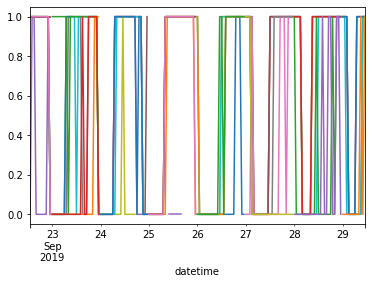

In [185]:
FILENAME = 'optima-sensors.xlsx'
SHEET_NAME = 'Luminance'

df = pd.read_excel(
    io=FILENAME,
    sheet_name=SHEET_NAME,
    parse_dates=['datetime', 'date'],
    header=1,
    index_col=0,
)


def activity_diagram(date, location):
    date = df['date'] == date
    location = df['location'] == location
    activity = df.loc[date & location, 'value']
    
    if activity.count():
        activity = activity.resample('H').sum().apply(np.sign)
        activity.plot()


for date in df['date'].unique():
    for location in df['location'].unique():
        activity_diagram(date, location)


# activity_diagram('2019-09-27', 'Sleeping Quarters upper') 
# activity_diagram('2019-09-28', 'Sleeping Quarters upper')

## DataFrame Statistics

1. Stwórz ``DataFrame`` samochody z:

    - losową kolumną liczb całkowitych przebieg z przedziału [0, 200 000]
    - losową kolumną spalanie z przedziału [2, 20]

1. Dodaj kolumnę marka:

    - jeżeli samochód ma spalanie [0, 5] marka to VW
    - jeżeli samochód ma spalanie [6, 10] marka to Ford
    - jeżeli samochód ma spalanie 11 i więcej, marka to UAZ

1. Dodaj kolumnę pochodzenie:

    - jeżeli przebieg poniżej 100 km, pochodzenie nowy
    - jeżeli przebieg powyżej 100 km, pochodzenie uzywany
    - jeżeli przebieg powyżej 100 000 km, pochodzenie z niemiec

1. Przeanalizuj dane statystycznie

    - sprawdź liczność grup
    - wykonaj analizę statystyczną

1. Pogrupuj dane po marce i po pochodzenie

## DataFrame Mapping

1. Pobierz :download:`data/phones.csv`
1. Użyj ``parse_dates=['date']`` przy wczytywaniu pliku
1. Podziel kolumnę z datetime na dwie osobne: datę i czas
1. Użyj lambdy

In [288]:
DATA = 'https://raw.githubusercontent.com/AstroMatt/book-python/master/numerical-analysis/pandas/data/phones.csv'

df = pd.read_csv(DATA, parse_dates=['date'])
df.drop(columns=['index'], inplace=True)
df.sort_index(ascending=True)
df[ ['year', 'mth'] ] = df['month'].str.split('-', expand=True)

df

,date,duration,item,month,network,network_type,year,mth
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data,2014,11
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile,2014,11
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile,2014,11
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile,2014,11
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile,2014,11
...,...,...,...,...,...,...,...,...
825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world,2015,03
826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile,2015,03
827,2015-03-13 06:58:00,34.429,data,2015-03,data,data,2015,03
828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world,2015,03


## DataFrame Cleaning Translate

1. Pobierz :download:`data/astro-dates.csv`
1. Ustaw nagłówek i index na dane zaczytane z pliku
1. Przekonwertuj polskie nazwy miesięcy na angielskie
1. Sparsuj daty do obiektów ``datetime``

## DataFrame Cleaning Substitute

1. Pobierz :download:`data/trl.xlsx`
1. Wybierz arkusz ``Polish``
1. Ustaw nagłówek i index na dane zaczytane z pliku
1. Zwróć uwagę na encoding
1. Podmień polskie znaki diakrytyczne na litery z alfabetu angielskiego
1. Porównaj ``df.replace(regex=True)`` z ``df.applymap()``

## DataFrame Cleaning Month number to text

1. Pobierz :download:`data/phones.csv`
1. Dodaj kolumnę ``year`` i ``month_name`` poprzez sparsowanie kolumny ``month``
1. Nazwa miesiąca musi być ciągiem znaków, a nie liczbą (i.e. 'January', 'May')

## DataFrame Groupby Astronauts

1. Pobierz zbiór danych astronautów :download:`data/astronauts.csv`
1. Stwórz ranking najbardziej doświadczonych astronautów (liczba lotów)

## DataFrame Groupby Phone Billing

1. Pobierz :download:`data/phones.csv`
1. Podaj informacje o łącznej liczbie wszystkich połączeń dla każdego miesiąca

## DataFrame Groupby EVA

1. Pobierz zbiór danych spacerów kosmicznych (EVA) :download:`data/eva.csv`
1. Stwórz ranking astronautów z największym czasem EVA

## DataFrame Join

1. Na podstawie podanych URL:

    * https://www.worldspaceflight.com/bios/eva/eva.php
    * https://www.worldspaceflight.com/bios/eva/eva2.php
    * https://www.worldspaceflight.com/bios/eva/eva3.php
    * https://www.worldspaceflight.com/bios/eva/eva4.php

1. Scrappuj stronę wykorzystując ``pandas.read_html()``
1. Połącz dane wykorzystując ``pd.concat``
1. Przygotuj plik ``CSV`` z danymi dotyczącymi spacerów kosmicznych
1. Zapisz dane do pliku
